Machine Leaarning Model to Predict the Insurance Charges



Module No: 1 

EDA --> Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv('insurance.csv')
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.shape 

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.isnull().sum() #finds the Null values and sum it to finds how many are missing

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#Extracting the Numeric Columns
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

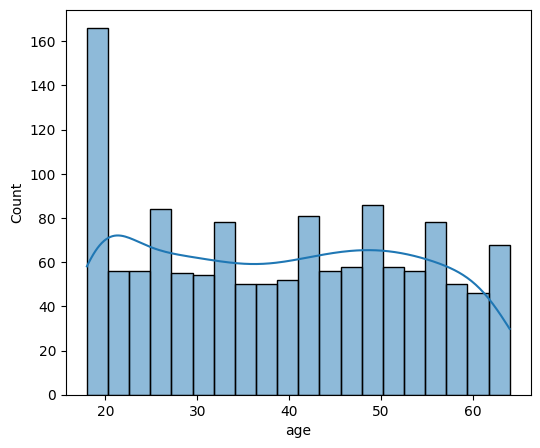

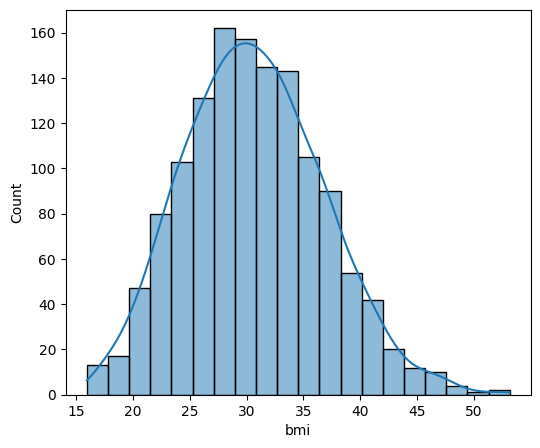

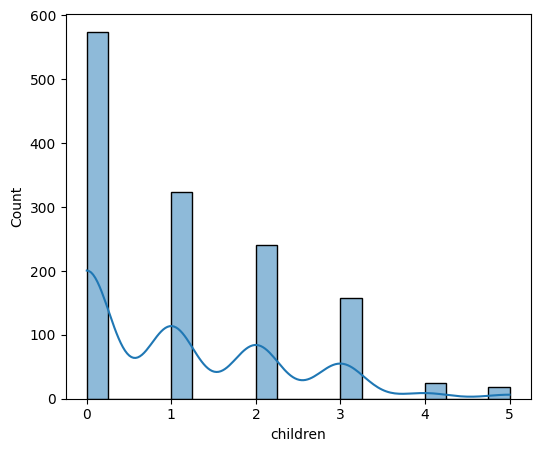

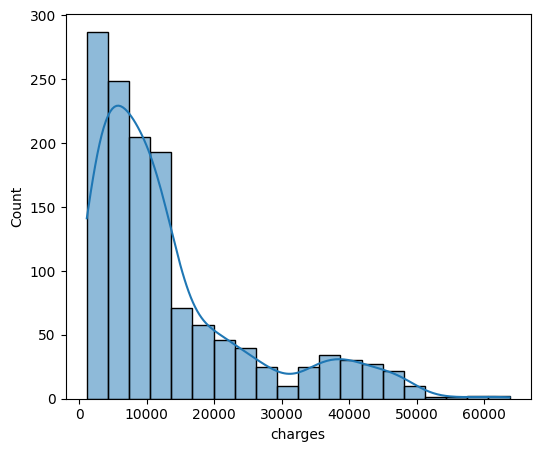

In [9]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
for columns in numeric_columns:
    plt.figure(figsize=(6,5))
    sns.histplot(data[columns], kde=True, bins=20)



<Axes: xlabel='children', ylabel='count'>

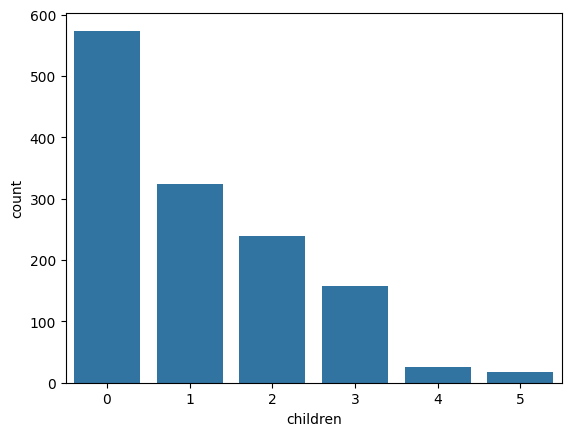

In [10]:
sns.countplot(x=data['children'])

<Axes: xlabel='sex', ylabel='count'>

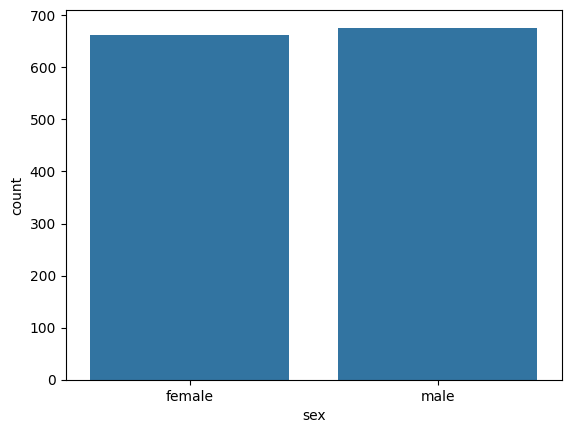

In [11]:
sns.countplot(x=data['sex'])

<Axes: xlabel='smoker', ylabel='count'>

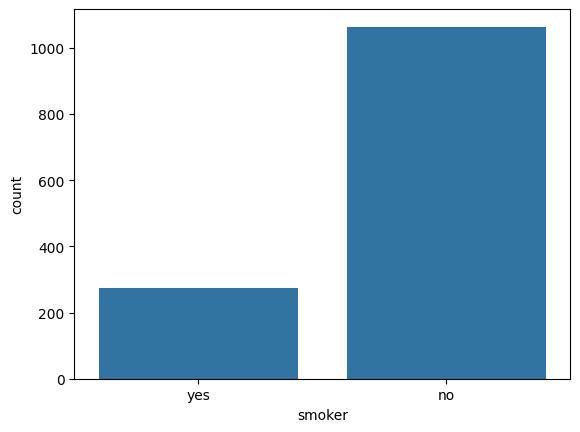

In [12]:
sns.countplot(x=data['smoker'])

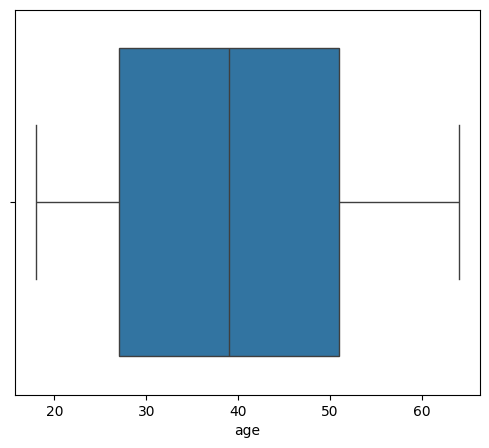

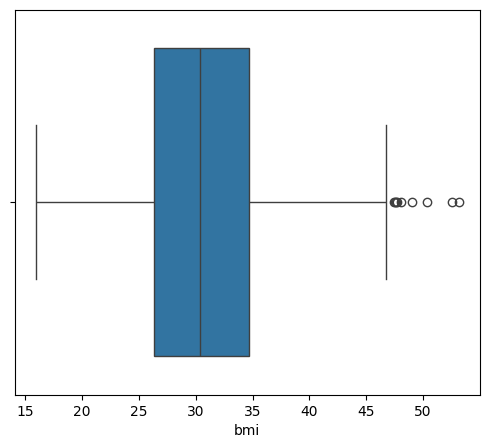

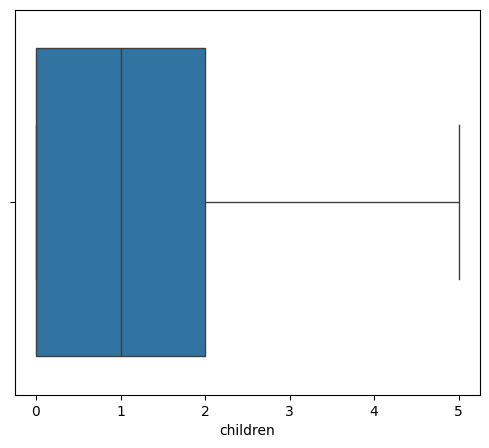

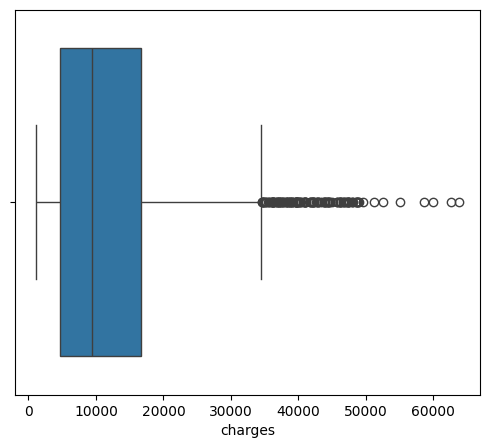

In [13]:
for columns in numeric_columns:
    plt.figure(figsize=(6,5))
    sns.boxplot(x=data[columns])

<Axes: >

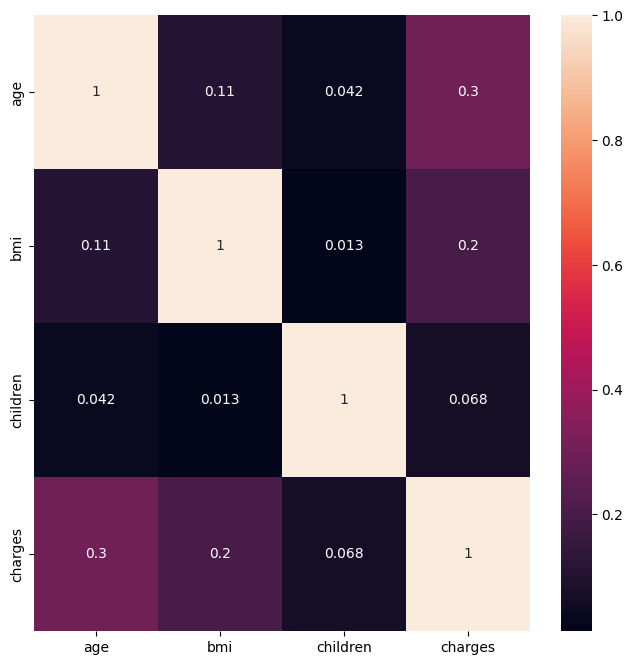

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(numeric_only=True), annot=True)

Data Cleaning and Preprocessing

In [15]:
#Filling the Missing Values
filling_missing_rows = data['charges'].fillna(data['charges'].mean(), inplace=True)
filling_missing_rows

In [16]:
#Removing Duplicate Rows
duplicates = data.drop_duplicates(inplace=True)
duplicates

In [17]:
cleaned_data = data.copy()

In [18]:
cleaned_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
cleaned_data.shape

(1337, 7)

In [20]:
cleaned_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
cleaned_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
cleaned_data['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [23]:
#Encoding the columns --> label Encoding

cleaned_data['sex'] = cleaned_data['sex'].map({'male' : 0, 'female' : 1})


In [24]:
cleaned_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [25]:
cleaned_data['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [26]:
cleaned_data['smoker'] = cleaned_data['smoker'].map({'yes' : 1, 'no' : 0})

In [27]:
cleaned_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [28]:
#Changing the columns name of Sex ---> gender 
cleaned_data.rename(columns={'sex' : 'gender'}, inplace=True)

In [29]:
cleaned_data.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [30]:
cleaned_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [31]:
#Applying One-Hot Encoding ---> making new columns for each category
cleaned_data = pd.get_dummies(cleaned_data,columns=['region'], drop_first=True)

In [32]:
cleaned_data.head()

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [33]:
cleaned_data = cleaned_data.astype(int)
cleaned_data

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


Feature Engineering and Extarction

<Axes: xlabel='bmi', ylabel='Count'>

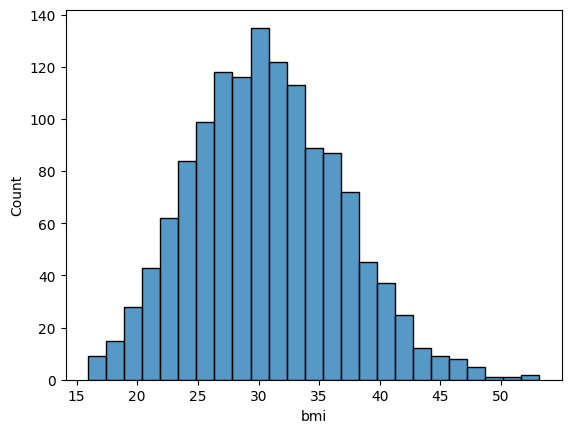

In [34]:
sns.histplot(data['bmi'])

In [35]:
#creating Category for BMI
cleaned_data['bmi_category'] = pd.cut(
    cleaned_data['bmi'], 
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [36]:
cleaned_data

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [37]:
#creating Category for Age
cleaned_data['Age_category'] = pd.cut(
    cleaned_data['age'], 
    bins=[0, 19, 39, 59, float('inf')],
    labels=['teenager', 'Youngadult', 'middleage','Senioradult']
)

In [38]:
cleaned_data

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category,Age_category
0,19,1,27,0,1,16884,0,0,1,Overweight,teenager
1,18,0,33,1,0,1725,0,1,0,Obese,teenager
2,28,0,33,3,0,4449,0,1,0,Obese,Youngadult
3,33,0,22,0,0,21984,1,0,0,Normal,Youngadult
4,32,0,28,0,0,3866,1,0,0,Overweight,Youngadult
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese,middleage
1334,18,1,31,0,0,2205,0,0,0,Obese,teenager
1335,18,1,36,0,0,1629,0,1,0,Obese,teenager
1336,21,1,25,0,0,2007,0,0,1,Overweight,Youngadult


In [39]:
cleaned_data = pd.get_dummies(cleaned_data,columns=['bmi_category'], drop_first=True)

In [40]:
cleaned_data = pd.get_dummies(cleaned_data,columns=['Age_category'], drop_first=True)

In [41]:
cleaned_data = cleaned_data.astype(int)
cleaned_data


,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,Age_category_Youngadult,Age_category_middleage,Age_category_Senioradult
0,19,1,27,0,1,16884,0,0,1,0,1,0,0,0,0
1,18,0,33,1,0,1725,0,1,0,0,0,1,0,0,0
2,28,0,33,3,0,4449,0,1,0,0,0,1,1,0,0
3,33,0,22,0,0,21984,1,0,0,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1,0,1,0
1334,18,1,31,0,0,2205,0,0,0,0,0,1,0,0,0
1335,18,1,36,0,0,1629,0,1,0,0,0,1,0,0,0
1336,21,1,25,0,0,2007,0,0,1,0,1,0,1,0,0


In [42]:
cleaned_data.head()

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,Age_category_Youngadult,Age_category_middleage,Age_category_Senioradult
0,19,1,27,0,1,16884,0,0,1,0,1,0,0,0,0
1,18,0,33,1,0,1725,0,1,0,0,0,1,0,0,0
2,28,0,33,3,0,4449,0,1,0,0,0,1,1,0,0
3,33,0,22,0,0,21984,1,0,0,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0,1,0,0


Feature Scaling

In [43]:
cleaned_data.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese',
       'Age_category_Youngadult', 'Age_category_middleage',
       'Age_category_Senioradult'],
      dtype='object')

In [44]:
#Use Sklearn to Preprocess the data and make it scale 
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
cleaned_data[cols] = scaler.fit_transform(cleaned_data[cols])


In [45]:
cleaned_data.head()

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,Age_category_Youngadult,Age_category_middleage,Age_category_Senioradult
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,0,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1,0,0,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1,1,0,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,1,0,0


In [46]:
#Extracting the Features that are highly correlated with the Result
#We will Use Pearsonr Correlation Correlation

from scipy.stats import pearsonr

selected_features = [
    'age', 'gender', 'bmi', 'children', 'smoker', 'charges',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]
correlations = {
    feature: pearsonr(cleaned_data[feature], cleaned_data['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
5,charges,1.000000
4,smoker,0.787234
0,age,0.298309
11,bmi_category_Obese,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
6,region_northwest,-0.038695
8,region_southwest,-0.043637
1,gender,-0.058046


In [47]:
# Now Analyzing Categorical Squre Test
cat_features = [
    'gender', 'smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [48]:
#Using Chi-Square Test --> This test is used to compare the categorical data 

from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

cleaned_data['charges_bin'] = pd.qcut(cleaned_data['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(cleaned_data[col], cleaned_data['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
gender,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [49]:
final_df = cleaned_data[['age', 'gender', 'bmi', 'children', 'smoker', 'charges','region_southeast','bmi_category_Obese']]
final_df

,age,gender,bmi,children,smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


## Now training a Model by using the data on 80/20 ratio, 80 for training and 20 for testing, and then evaluating the model on the test data.

In [50]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_df.drop('charges', axis=1) # taking the features as input except charges
y = final_df['charges'] # taking the target as output

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Now we will evalute our Model, by using R-Square and Adjusted R -Square. These are performane matrices that helps us to know how good our model is.

In [60]:
y_prediction = model.predict(X_test)

In [63]:
# Performance Exvaluation
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_prediction)
r2

n = X_test.shape[0] # Selecting the Rows
p = X_test.shape[1] # Selecting the Columns

adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1) # Adjusted R-squared formula
adjusted_r2

0.7987962362937232

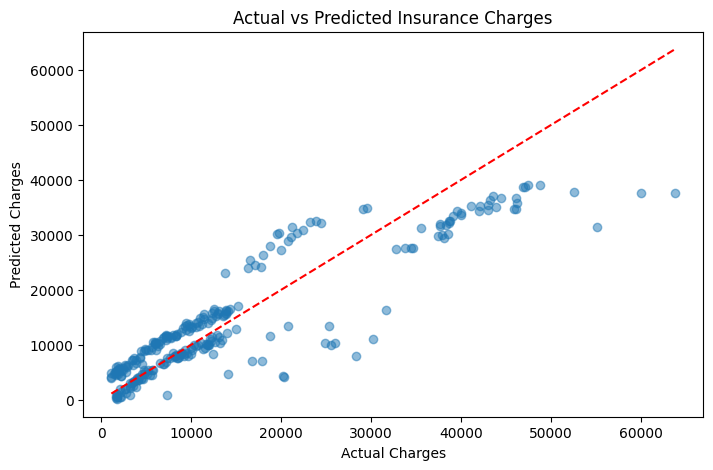

In [64]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_prediction, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()